# Control Net

In [1]:
import cv2
import numpy as np

from PIL import Image
from diffusers.utils import load_image, make_image_grid

/home/admin/workspace/generative-models-pytorch/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
original_image = load_image(
    "/home/admin/workspace/generative-models-pytorch/notebook/assets/9_ControlNet/origin_1.png"
)

image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

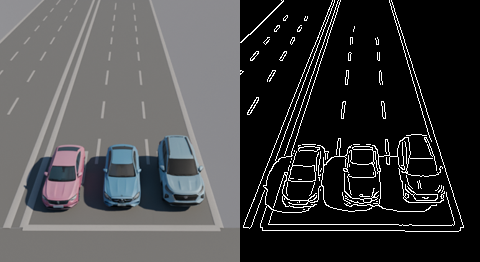

In [3]:
make_image_grid([original_image, canny_image], rows=1, cols=2)

In [4]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

sd_path = "/home/admin/workspace/diffusion_model/sd"
controlnet_canny_path = "/home/admin/workspace/diffusion_model/controlnet/sd-controlnet-canny"

controlnet = ControlNetModel.from_pretrained(controlnet_canny_path, torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    sd_path, controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 16.64it/s]


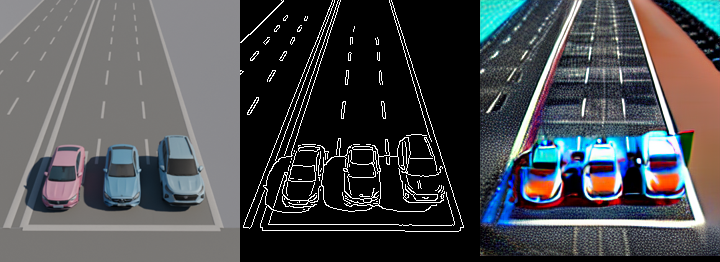

In [24]:
output = pipe(
    "vehicles on the road, Realistic style", image=canny_image,
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)

In [11]:
import cv2
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
import numpy as np
from diffusers.utils import load_image

image = load_image("/home/admin/workspace/generative-models-pytorch/notebook/assets/9_ControlNet/bird.png")
image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

new_image = pipe("bird", image, num_inference_steps=20).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:01<00:00, 10.26it/s]


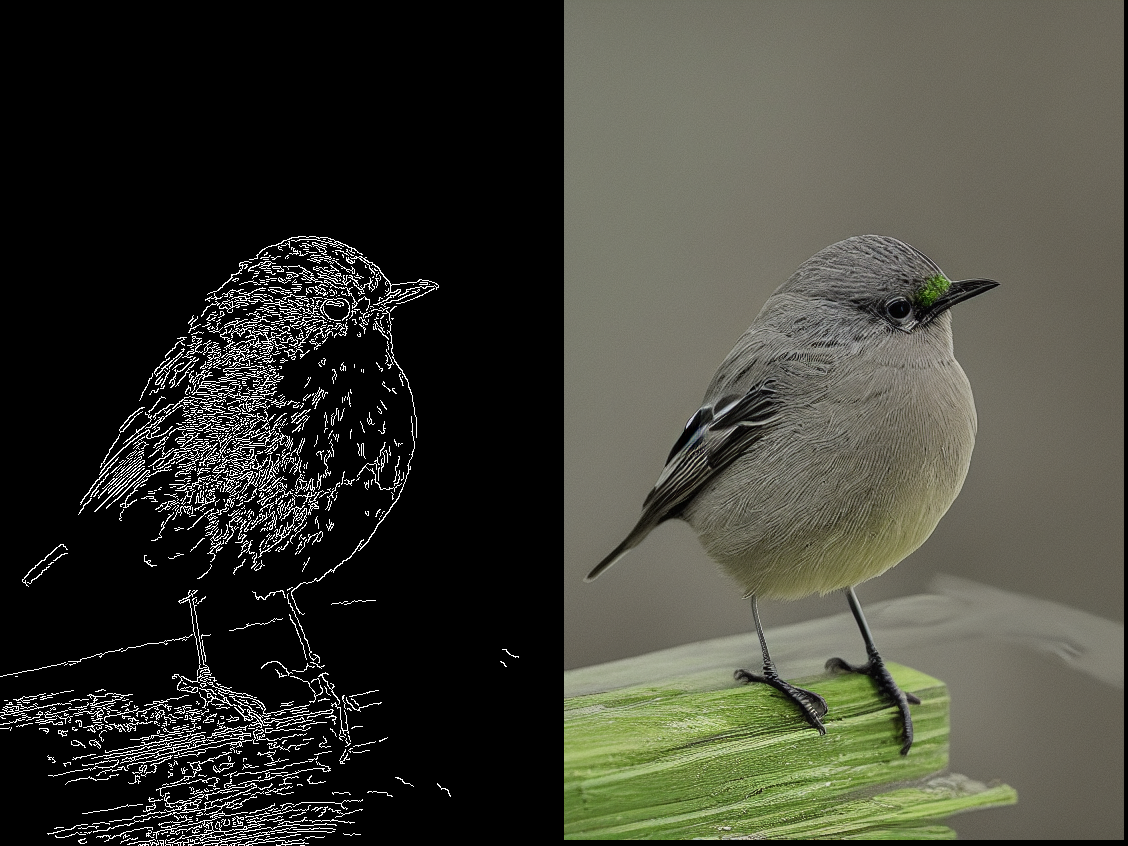

In [12]:
make_image_grid([image, new_image], rows=1, cols=2)